## TItanic dataset from Kaggle

### Importing Libraries and modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from IPython.display import display

### Importing Datasets and displaying them

In [2]:
training = "/home/chinmayee/my_machine_learning_journey/100_Days_of_code_challenge/train.csv"
testing = "/home/chinmayee/my_machine_learning_journey/100_Days_of_code_challenge/test.csv"
df_train = pd.read_csv(training)
df_test = pd.read_csv(testing)
display(df_train.head())
display(df_test.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Plotting the dataset

<Figure size 1080x576 with 0 Axes>

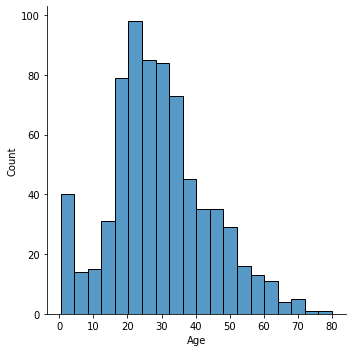

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 8))
sns.displot(df_train['Age'])

plt.show()

# Preprocessing
0. remove unnecessary columns
1. Null value handle
2. string value handle
3. standardization / normalization

### Removing unnecessary columns

In [4]:
# Dropping unnecessary columns

X = df_train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis =1)
y = df_train['Survived']
X_t = df_test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)



### Null value handling

In [5]:
# Printing data types of each data set
print('Train dataset :', X.dtypes)
print('\nTest dataset :', X_t.dtypes)
print('\nTarget: ', y.dtypes)

# Printing the null values in each column
print('\n\nNull Values')
print('\nTrain dataset :', X.isnull().sum())
print('\nTest dataset :', X_t.isnull().sum())
print('\nTarget: ', y.isnull().sum())

# Filling null datas

#loc stands for locate.It locates the assigned index
def fill_nulldata(df):
    for col in df.columns:
        
        if df[col].dtype == object:
            df.loc[df[col].isnull() == True, col] = df[col].mode()[0]# [0] is written for the object type data
            
        else:
            df.loc[df[col].isnull() == True, col] = df[col].mean()
    
fill_nulldata(X)
fill_nulldata(X_t)


print('\n\nNull Values')
print('\nTrain dataset :', X.isnull().sum())
print('\nTest dataset :', X_t.isnull().sum())
print('\nTarget: ', y.isnull().sum())

Train dataset : Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Test dataset : Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Target:  int64


Null Values

Train dataset : Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Test dataset : Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Target:  0


Null Values

Train dataset : Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Test dataset : Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Target:  0


### String and character value handling

In [6]:
X = pd.get_dummies(X)
X_t = pd.get_dummies(X_t)
display(X, X_t, y)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.000000,1.0,0.0,7.2500,0,1,0,0,1
1,1.0,38.000000,1.0,0.0,71.2833,1,0,1,0,0
2,3.0,26.000000,0.0,0.0,7.9250,1,0,0,0,1
3,1.0,35.000000,1.0,0.0,53.1000,1,0,0,0,1
4,3.0,35.000000,0.0,0.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,0,1,0,0,1
887,1.0,19.000000,0.0,0.0,30.0000,1,0,0,0,1
888,3.0,29.699118,1.0,2.0,23.4500,1,0,0,0,1
889,1.0,26.000000,0.0,0.0,30.0000,0,1,1,0,0


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,34.50000,0.0,0.0,7.8292,0,1,0,1,0
1,3.0,47.00000,1.0,0.0,7.0000,1,0,0,0,1
2,2.0,62.00000,0.0,0.0,9.6875,0,1,0,1,0
3,3.0,27.00000,0.0,0.0,8.6625,0,1,0,0,1
4,3.0,22.00000,1.0,1.0,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3.0,30.27259,0.0,0.0,8.0500,0,1,0,0,1
414,1.0,39.00000,0.0,0.0,108.9000,1,0,1,0,0
415,3.0,38.50000,0.0,0.0,7.2500,0,1,0,0,1
416,3.0,30.27259,0.0,0.0,8.0500,0,1,0,0,1


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Feature scaling: Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# call sc.fit_transform for the first variable then the nxet will be fitted accordingly
X_scaled = sc.fit_transform(X)
X_t_scaled = sc.transform(X_t) 


### Hyperparameter tuning


In [ ]:
model = RandomForestClassifier()


cv = RepeatedStratifiedKFold(n_repeats= 10, n_splits= 5, random_state = 1)
space = dict()
#space['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
#space['metric'] = ['euclidean', 'manhattan', 'chebyshev', 'minkowski','wminkowski', 'seuclidean', 'mahalanobis']
#space['leaf_size'] = (0, np.inf)
#space['weights']= ['uniform', 'distance']
#space['p'] = (0, np.inf)

space['criterion'] = ['gini', 'entropy']
space['n_estimators'] = (-100, 1000)
space['max_depth'] = (-10, 90000)
space['min_samples_split']= (2, 90000)
space['max_leaf_nodes'] = (2, 90000)
space['max_features'] = ['auto', 'sqrt', 'log2']
space['bootstrap'] = [True, False]
space['class_weight'] = ['balanced', 'balanced_subsample']




search = RandomizedSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
result = search.fit(X_scaled, y)

print('Best score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

### Fitting the model

In [ ]:
model_tuned = RandomForestClassifier(n_estimators =10, min_samples_split= 2, max_leaf_nodes= 100000, max_features= 'auto', max_depth= 2000000, criterion= 'gini', class_weight= 'balanced', bootstrap= False)
model_tuned.fit(X_scaled, y) 


### Predict

In [ ]:
predict = model_tuned.predict(X_t_scaled)
Submission = pd.DataFrame({'PassengerId':list(range(892,1310))})
Submission['Survived']=predict

Submission

In [ ]:
Submission.to_csv('submission4.csv', index=False)